# Group 7 / Coursework 1

### This is the first coursework for Big Data in Finance II. In this coursework, we use CPZ data to find useful macros and micros that can predict future stock returns, with the following questions.

# Question 1

The first question is simply loading data.

In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('src/CPZ_data_mini.csv')
data.head()

,Date,permno,ret,ST_REV,SUV,r12_2,NOA,SGA2S,LME,RNA,...,Lev,Resid_Var,D12,E12,b/m,ntis,tbl,tms,dfy,svar
0,1967-01-01,10006,0.136223,-0.241259,-0.325175,-0.043124,0.134033,-0.383450,0.010490,0.045455,...,-0.010490,-0.224942,2.88,5.51667,0.533363,0.015698,0.0496,-0.0048,0.0077,0.000733
1,1967-01-01,10014,0.317129,-0.399767,-0.064103,0.364802,-0.294872,-0.175991,-0.488345,0.038462,...,0.173660,0.483683,2.88,5.51667,0.533363,0.015698,0.0496,-0.0048,0.0077,0.000733
2,1967-01-01,10102,0.101064,0.500000,0.273893,-0.294872,0.269231,0.001166,0.103730,-0.145688,...,0.003497,-0.129371,2.88,5.51667,0.533363,0.015698,0.0496,-0.0048,0.0077,0.000733
3,1967-01-01,10145,0.287367,-0.001166,0.378788,-0.341492,0.236597,-0.178322,0.339161,-0.136364,...,-0.078089,-0.460373,2.88,5.51667,0.533363,0.015698,0.0496,-0.0048,0.0077,0.000733
4,1967-01-01,10153,0.143427,0.152681,-0.304196,-0.427739,0.243590,-0.189977,-0.003497,-0.278555,...,-0.120047,0.071096,2.88,5.51667,0.533363,0.015698,0.0496,-0.0048,0.0077,0.000733


# Question 3

For convenience, we first do question 3 as it is related to data preprocessing. And in question 2, we want to explain the factors both intuitively and numerically. 

Below is to split the data into train, validation and test set. We didn't shuffle the data since it is based on time series.

In [6]:
import warnings
warnings.filterwarnings('ignore')
# create next month return for prediction
data.sort_values(by=['permno','Date'],inplace=True)
data['ret_future'] = data.groupby('permno')['ret'].shift(-1)

# drop missing values at last period 
data = data.dropna()

# get features and target
X,y = data.drop(columns=['ret','ret_future','Date','permno']).copy(), data['ret_future'].copy()

# train test split
train = ('1967-01-01' <= data['Date']) & (data['Date'] < '1997-01-01')
vali = ('1997-01-01' <= data['Date']) & (data['Date'] < '2007-01-01')
test = ('2007-01-01' <= data['Date']) & (data['Date'] < '2016-11-01')

# normalisation
X -= X.loc[train+vali].mean()
X /= X.loc[train+vali].std()

In [7]:
# Split X and y
# X_cindex = [0] + list(range(2, len(data.columns))) # column index
X_train, y_train = X[train], y[train]
X_vali, y_vali = X[vali], y[vali]
X_test, y_test = X[test], y[test]

print(X_train.head(), '\n', '\n', y_train.head())

        ST_REV       SUV     r12_2       NOA     SGA2S       LME       RNA  \
0    -0.835475 -1.126016 -0.149576  0.463143 -1.327287  0.033614  0.155377   
430   0.246762 -1.295603 -0.691005  0.471216 -1.327287  0.065918  0.139228   
860  -0.934251  0.620900 -0.540247  0.474145 -1.328226  0.013386  0.134871   
1291  1.350499  1.485848 -0.633657  0.464702 -1.332855  0.104795  0.145242   
1727  0.351699 -0.103246  0.175657  0.461785 -1.323957  0.117017  0.133609   

      LTurnover       Lev  Resid_Var       D12       E12       b/m      ntis  \
0      0.206463 -0.035011  -0.778541 -1.546724 -1.212948  0.227479  0.122518   
430   -0.027822 -0.043086  -0.916012 -1.544929 -1.214815  0.251663  0.238802   
860    0.242254 -0.038955  -0.861437 -1.543133 -1.216681  0.286043  0.077471   
1291   0.745404 -0.034509   0.237075 -1.543133 -1.218920  0.217181  0.084707   
1727   0.048368 -0.022618   0.353522 -1.543133 -1.221159  0.317339 -0.123183   

           tbl       tms       dfy      svar  
0  

# Question 2

There are a lot of hyperparameters in neural network models. The followings justify our choice on activation function and optimizer.

### Activation Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def elu(z):
    x1 = z.copy()
    x1[x1>0] = x1[x1>0]
    x1[x1<=0] = np.exp(x1[x1<=0]) - 1
    return x1

def lrelu(z):
    x1 = z.copy()
    x1[x1>0] = x1[x1>0]
    x1[x1<=0] = 0.1*x1[x1<=0]
    return x1

def relu(z):
    x1 = z.copy()
    zero = np.zeros(len(x1))
    return np.max([zero, x1], axis=0)

def sigmoid(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s)  
    return s,ds

def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t,dt

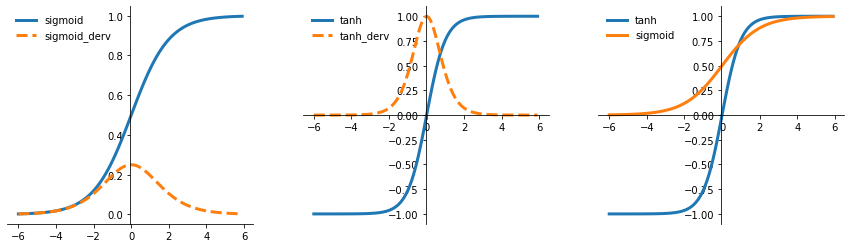

In [2]:
z = np.arange(-6, 6, .1)

# Setup centered axes
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
ax1.spines['left'].set_position('center')
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax2.spines['left'].set_position('center')
ax2.spines['bottom'].set_position('center')
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax3.spines['left'].set_position('center')
ax3.spines['bottom'].set_position('center')
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.xaxis.set_ticks_position('bottom')
ax3.yaxis.set_ticks_position('left')
# Create and show plot
ax1.plot(z,sigmoid(z)[0], linewidth=3, label="sigmoid")
ax1.plot(z,sigmoid(z)[1], linewidth=3, ls='dashed',label="sigmoid_derv")
ax1.legend(loc="best", frameon=False)

ax2.plot(z,tanh(z)[0], linewidth=3, label="tanh")
ax2.plot(z,tanh(z)[1], linewidth=3, ls='dashed', label="tanh_derv")
ax2.legend(loc="best", frameon=False)

ax3.plot(z,tanh(z)[0], linewidth=3, label="tanh")
ax3.plot(z,sigmoid(z)[0], linewidth=3, label="sigmoid")
ax3.legend(loc="best", frameon=False)
# fig.show()

Sigmoid and Tanh are two possible functions, which can be used as nonlinear activation functions between layers of a neural network. Sigmoid is preferred while dealing with binary classification problem as its outputs are between 0 and 1. Tanh is more preferred in practice than Sigmoid as it is zero centered (i.e. making the optimisation easier). However, as we can see from the above figures, the gradients of both activation functions converge to zero if the values are small or big. Therefore, there is no learning when the values are small or big. Hence, rectified linear unit (ReLU) is preferred nowadays, which is less computational intensive and avoids and rectifies vanishing gradient problem of training the neural nets.

ReLU activation also has limitation. Since it assigns zeros to all negative values, some gradients can be fragile during training and can die, which will make the neurons never activate on any data point again. Some activations (e.g. Leaky ReLU, ELU) are introduced nowadays trying to fix the problem of dying neurons. The following figure visualises the differences between different activation functions.

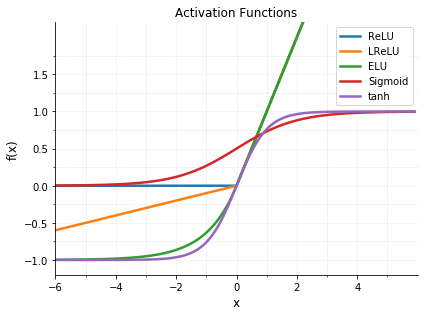

In [3]:
z = np.arange(-6, 6, .1)

fig = plt.figure(figsize=(6,4.5))
ax = fig.add_subplot(111)
ax.plot(z, relu(z), label='ReLU', lw=2.5)
ax.plot(z, lrelu(z), label='LReLU', lw=2.5)
ax.plot(z, elu(z), label='ELU', lw=2.5)
ax.plot(z, sigmoid(z)[0], label='Sigmoid', lw=2.5)
ax.plot(z, tanh(z)[0], label='tanh', lw=2.5)

ax.set_ylim([-2.0, 2.0])
ax.set_xlim([-2.0, 2.0])
ax.grid(True)
ax.set_xlabel('x', size=12)
ax.set_ylabel('f(x)', size=12)
ax.set_title('Activation Functions',size=12)
plt.xlim(-6,6)
plt.ylim(-1.2,2.2)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
plt.grid(True, 'major', ls='--', lw=.5, c='k', alpha=.1)
plt.grid(True, 'minor', ls=':', lw=.5, c='k', alpha=.25)
#    ax.set_xticks(np.arange(-1, 1, 0.25))
#    ax.set_yticks(np.arange(-5, 6., 0.25))
ax.tick_params(axis='y', which='both', colors='k')
major_ticks = np.arange(-1, 2, 0.5)
minor_ticks = np.arange(-1, 2, 0.25)
major_ticks1 = np.arange(-6, 6, 2)
minor_ticks1 = np.arange(-6, 6, 1)
ax.set_xticks(major_ticks1)
ax.set_xticks(minor_ticks1, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
plt.legend(loc=0)
plt.tight_layout()
#plt.savefig('activations.pdf')
plt.show()

### Adam v.s. SGD

In [ ]:
X_train_opt, y_train_opt = X[train+vali], y[train+vali]

There are some methods can be used to optimise the deep learning networks. Gradient descent is the most common method first proposed in the 1950s. Stochastic Gradient Descent (SGD) is a variant of gradient descent, which only computes on a small subset or random selection of data examples. A number of new optimisers have been proposed recently to tackle complex training scenarios where gradient descent methods behave poorly. And the most widely used one is Adam, which is an algorithm for gradient-based optimisation of stochastic objective functions. Compared to SGD fixing learning rates for all parameters, Adam computes individual adaptive learning rates for different parameters. Therefore, Adam can achieve faster convergence.

However, some adaptive methods (e.g. Adam) might lack of generalisation performance compared to SGD and they might fail to converge to an optimal solution under specific settings (e.g. extreme learning rates) (see e.g. Keskar et al., 2016; Keskar and Socher, 2017).

There are some recent papers to make some improvements on the adaptive methods. AdaBound and AmsBound are new variants of Adam and AmsGrad respectively, which employ dynamic bounds on learning rates in adaptive optimization algorithms. The lower bounds are initialised as zero and the upper bounds are initialised as infinity (Luo et al., 2019). In their experiments on several standard benchmarks (e.g. DenseNet and ResNet on CIFAR 10), AdaBound and AmsBound maintain relatively fast speed on training and hyperparameter insensitivity.

<table><tr><td><img src="gph/contours_evaluation_optimizers.gif" width="300"></td><td><img src="gph/saddle_point_evaluation_optimizers.gif" width="300"></td></tr></table>
Different methods' behaviour on the contours of a loss surface (the Beale function) over time [left] and behaviour at a saddle point [right]. In the left figure, we notice the "overshooting" behavior of momentum-based methods. In the saddle point test, SGD, Momentum, and NAG find it difficulty to break symmetry and Adagrad, RMSprop, and Adadelta can quickly head down the negative slope. Images credit: Alec Radford.

Keskar, N.S., Mudigere, D., Nocedal, J., Smelyanskiy, M. and Tang, P.T.P., 2016. On large-batch training for deep learning: Generalization gap and sharp minima. arXiv preprint arXiv:1609.04836.

Keskar, N.S. and Socher, R., 2017. Improving generalization performance by switching from adam to sgd. arXiv preprint arXiv:1712.07628.

Luo, L., Xiong, Y., Liu, Y. and Sun, X., 2019. Adaptive gradient methods with dynamic bound of learning rate. arXiv preprint arXiv:1902.09843.

#### Experiments on CPZ_data_mini

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.initializers import he_normal
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# hyperparameters
lamda = 0.0001
alpha = 0.00001
# optimization = Adam
p = 0.1
epochs = 20
batch_size = 64
activation = 'relu'
num_neurons = [32,16,8]
num_layers = len(num_neurons)
vd_split = 0.3

def train_nn(X, y, epochs=20, verbose=1, alpha=0.001, learning_method='sgd',*args, **kwargs):
    model = Sequential()
    
    # input layer
    model.add(Dense(num_neurons[0], activation='relu',
                    kernel_regularizer=l2(l=lamda), 
                    kernel_initializer=he_normal(),
                    input_dim=X.shape[1]))
    model.add(Dropout(p))
    
    # hidden layer
    for i in range(1, num_layers-1):
        model.add(Dense(num_neurons[i], activation='relu', 
                        kernel_regularizer=l2(l=lamda), 
                        kernel_initializer=he_normal()))
        model.add(Dropout(p))

    # output layer
    model.add(Dense(1, activation='linear',
                    kernel_initializer=he_normal()))
    
    # compile
    if learning_method=='sgd':
        model.compile(loss='mse',
                      optimizer=SGD(learning_rate=alpha),
                      metrics=['mse'])
    elif learning_method=='adam':
        model.compile(loss='mse',
                      optimizer=Adam(learning_rate=alpha),
                      metrics=['mse'])
    
    tf.keras.backend.set_learning_phase(True)
    history = model.fit(X,y,
                     epochs=epochs, batch_size=64,
                     validation_split=vd_split,
                     verbose=verbose)
    tf.keras.backend.set_learning_phase(False)

    return model, history

def plot_loss(history, label_=None): # label can be any hyperparameter to test
    if label_:
        plt.plot(history.history['loss'], label = label_)
        plt.legend()
    else:
        plt.plot(history.history['loss'])
    plt.ylabel('mse')
    plt.xlabel('Epoch')

In [ ]:
np.random.seed(0)
tf.set_random_seed(0)
lr_list = [1e-1,1e-2,1e-3,1e-4,1e-5]
for i,lr in tqdm(enumerate(lr_list)):
    model, model_history = train_nn(X.values, y, epochs=20, verbose=1, alpha=lr, learning_method='adam')
    model_SGD, model_history_SGD = train_nn(X.values, y, epochs=20, verbose=1, alpha=lr, learning_method='sgd')
    path = ('/adam_sgd/%f'%(lr)).rstrip('0')
    np.savetxt(path+'/training_loss_adam.txt',model_history.history['loss'])
    np.savetxt(path+'/training_loss_sgd.txt',model_history_SGD.history['loss'])
    np.savetxt(path+'/val_loss_adam.txt',model_history.history['val_loss'])
    np.savetxt(path+'/val_loss_sgd.txt',model_history_SGD.history['val_loss'])

We have already saved the above training results. You can directly import the saved files as below.

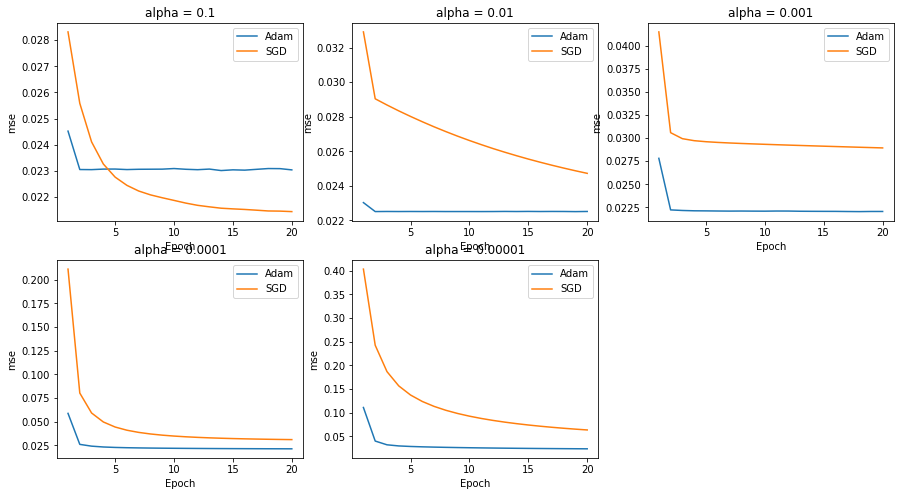

In [21]:
lr_list = [1e-1,1e-2,1e-3,1e-4,1e-5]
training_loss = plt.figure(figsize=(15,8))
for i in range(len(lr_list)):
    lr_curr = lr_list[i]
    path = (r'esttab\adam_sgd\%f'%(lr_curr)).rstrip('0')
    train_loss_adam = np.loadtxt(path+'/training_loss_adam.txt')
    train_loss_agd = np.loadtxt(path+'/training_loss_sgd.txt')

    plt.subplot(2,3,i+1)
    plt.plot(np.arange(1,len(train_loss_adam)+1),train_loss_adam,label='Adam')
    plt.plot(np.arange(1,len(train_loss_agd)+1),train_loss_agd,label='SGD')
    plt.ylabel('mse')
    plt.xlabel('Epoch')
    plt.title(('alpha = %f'%(lr_curr)).rstrip('0'))
    plt.legend()

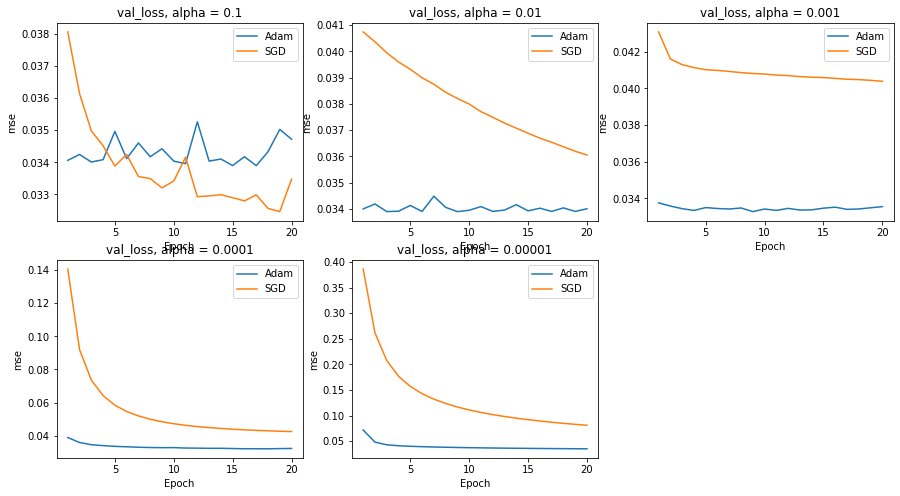

In [22]:
val_loss = plt.figure(figsize=(15,8))
for i in range(len(lr_list)):
    lr_curr = lr_list[i]
    path = (r'esttab\adam_sgd\%f'%(lr_curr)).rstrip('0')
    val_loss_adam = np.loadtxt(path+'/val_loss_adam.txt')
    val_loss_agd = np.loadtxt(path+'/val_loss_sgd.txt')

    plt.subplot(2,3,i+1)
    plt.plot(np.arange(1,len(val_loss_adam)+1),val_loss_adam,label='Adam')
    plt.plot(np.arange(1,len(val_loss_agd)+1),val_loss_agd,label='SGD')
    plt.ylabel('mse')
    plt.xlabel('Epoch')
    plt.title(('val_loss, alpha = %f'%(lr_curr)).rstrip('0'))
    plt.legend()

In this experiment, we can see that the Adam converges faster than the SGD method. However, Adam fails to converge to an optimal solution when we set a large learning rate (i.e. 0.1). The SGD's performances are more generalised.

Given the above experimental results, we decided to use 'ReLU' as the activation function and use 'Adam' as our optimizer in the following experiments.

### Importance of variables

Below is the training algorithm. We listed several hyperparameters here. To do the cross validation, one can add the hyperparameter into function *train_nn*.

In [7]:
tf.random.set_seed(0)

# hyperparameters
lamda = 0.0001
alpha = 1e-5
# optimization = Adam
p = 0.1
epochs = 20
batch_size = 64
activation = 'relu'
num_layers = 3
num_neurons = [16, 8, 1]

def train_nn(X, y, epochs=20, verbose=1, *args, **kwargs):
    model = Sequential()
    
    # input layer
    model.add(Dense(num_neurons[0], activation='relu',
                    kernel_regularizer=l2(l=lamda), 
                    kernel_initializer=he_normal(),
                    input_dim=X.shape[1]))
    model.add(Dropout(p))
    
    # hidden layer
    for i in range(1, num_layers-1):
        model.add(Dense(num_neurons[i], activation='relu', 
                        kernel_regularizer=l2(l=lamda), 
                        kernel_initializer=he_normal()))
        model.add(Dropout(p))

    # output layer
    model.add(Dense(1, activation='linear',
                    kernel_initializer=he_normal()))
    
    # compile
    model.compile(loss='mse',
                  optimizer=Adam(learning_rate=alpha),
                  metrics=['mse'])
    
    tf.keras.backend.set_learning_phase(True)
    history = model.fit(X,y,
                     epochs=epochs, batch_size=64,
                     verbose=verbose)
    tf.keras.backend.set_learning_phase(False)

    return model, history

def plot_loss(history, label_=None): # label can be any hyperparameter to test
    if label_:
        plt.plot(history.history['loss'], label = label_)
        plt.legend()
    else:
        plt.plot(history.history['loss'])
    plt.ylabel('mse')
    plt.xlabel('Epoch')

In [11]:
model, history = train_nn(X_train, y_train, 20)

Train on 619704 samples
Epoch 1/20
619704/619704 [==============================] - 14s 23us/sample - loss: 1.9960 - mse: 1.9914
Epoch 2/20
619704/619704 [==============================] - 13s 20us/sample - loss: 0.2143 - mse: 0.2101
Epoch 3/20
619704/619704 [==============================] - 12s 20us/sample - loss: 0.0835 - mse: 0.0795
Epoch 4/20
619704/619704 [==============================] - 13s 20us/sample - loss: 0.0425 - mse: 0.0387
Epoch 5/20
619704/619704 [==============================] - 12s 20us/sample - loss: 0.0300 - mse: 0.0265
Epoch 6/20
619704/619704 [==============================] - 13s 20us/sample - loss: 0.0265 - mse: 0.0232
Epoch 7/20
619704/619704 [==============================] - 13s 20us/sample - loss: 0.0254 - mse: 0.0223
Epoch 8/20
619704/619704 [==============================] - 12s 20us/sample - loss: 0.0249 - mse: 0.0220
Epoch 9/20
619704/619704 [==============================] - 13s 20us/sample - loss: 0.0245 - mse: 0.0219
Epoch 10/20
619704/619704 [====

619704/619704 [==============================] - 13s 21us/sample - loss: 0.0221 - mse: 0.0217


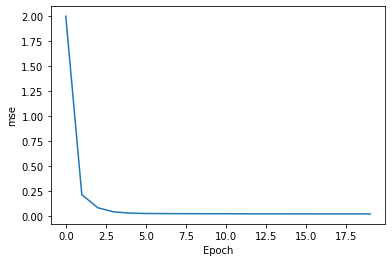

In [12]:
# performance evaluation
metrics = model.evaluate(X_train,y_train)
mse_base = metrics[1]
# plot
plot_loss(history)

We want to select 5 micros due to the amount of mse increase after dropping one certain feature from the original training step.

In [13]:
def select_features(num=5):
    # variable importance measure for each of the 10 micro characteristics
    features = X.columns
    # set up list to hold importance measures
    importances = [] 
    # loop over all micro variables
    for var in features:

        # drop variable from X 
        print('### Dropping %s' %var)
        X_drop = X_train.drop(columns=[var])

        # train and evaluate network with variable dropped
        model_drop,_ = train_nn(X_drop,y_train, epochs=20)

        # get mse from new model
        metrics = model_drop.evaluate(X_drop,y_train)
        mse_drop = metrics[1]

        # get increase in MSE relative to base
        mse_diff = mse_drop - mse_base
        print('--> MSE increases by %.5f\n' % mse_diff)

        # save in importance list
        importances.append(mse_diff)

    # normalise
    importances /= sum(importances)
    importances = list(importances)
    
    # select features
    best_features = []
    for i in range(1, num+1):
        feature = sorted(importances)[-i]
        best_features.append(features[importances.index(feature)])
    return importances, best_features

importances, best_features = select_features(num=5)

### Dropping ST_REV
Train on 619704 samples
Epoch 1/20
619704/619704 [==============================] - 13s 21us/sample - loss: 0.4364 - mse: 0.4317
Epoch 2/20
619704/619704 [==============================] - 12s 20us/sample - loss: 0.0817 - mse: 0.0772
Epoch 3/20
619704/619704 [==============================] - 12s 20us/sample - loss: 0.0377 - mse: 0.0334
Epoch 4/20
619704/619704 [==============================] - 12s 20us/sample - loss: 0.0290 - mse: 0.0249
Epoch 5/20
619704/619704 [==============================] - 13s 21us/sample - loss: 0.0266 - mse: 0.0228
Epoch 6/20
619704/619704 [==============================] - 12s 20us/sample - loss: 0.0257 - mse: 0.0222
Epoch 7/20
619704/619704 [==============================] - 12s 19us/sample - loss: 0.0252 - mse: 0.0220
Epoch 8/20
619704/619704 [==============================] - 12s 19us/sample - loss: 0.0247 - mse: 0.0219
Epoch 9/20
619704/619704 [==============================] - 12s 19us/sample - loss: 0.0242 - mse: 0.0219
Epoch 10/20

619704/619704 [==============================] - 13s 21us/sample - loss: 0.0306 - mse: 0.0261
Epoch 5/20
619704/619704 [==============================] - 13s 20us/sample - loss: 0.0278 - mse: 0.0236
Epoch 6/20
619704/619704 [==============================] - 15s 24us/sample - loss: 0.0266 - mse: 0.0228
Epoch 7/20
619704/619704 [==============================] - 13s 20us/sample - loss: 0.0258 - mse: 0.0223
Epoch 8/20
619704/619704 [==============================] - 12s 19us/sample - loss: 0.0252 - mse: 0.0221
Epoch 9/20
619704/619704 [==============================] - 14s 22us/sample - loss: 0.0246 - mse: 0.0220
Epoch 10/20
619704/619704 [==============================] - 12s 20us/sample - loss: 0.0242 - mse: 0.0219
Epoch 11/20
619704/619704 [==============================] - 12s 20us/sample - loss: 0.0238 - mse: 0.0219
Epoch 12/20
619704/619704 [==============================] - 12s 20us/sample - loss: 0.0234 - mse: 0.0218
Epoch 13/20
619704/619704 [==============================] - 12

Epoch 17/20
619704/619704 [==============================] - 12s 20us/sample - loss: 0.0222 - mse: 0.0217
Epoch 18/20
619704/619704 [==============================] - 12s 20us/sample - loss: 0.0221 - mse: 0.0217
Epoch 19/20
619704/619704 [==============================] - 12s 19us/sample - loss: 0.0221 - mse: 0.0217
Epoch 20/20
619704/619704 [==============================] - 12s 19us/sample - loss: 0.0219 - mse: 0.0216
--> MSE increases by -0.00011

### Dropping E12
Train on 619704 samples
Epoch 1/20
619704/619704 [==============================] - 12s 20us/sample - loss: 1.1554 - mse: 1.1507
Epoch 2/20
619704/619704 [==============================] - 12s 19us/sample - loss: 0.2246 - mse: 0.2201
Epoch 3/20
619704/619704 [==============================] - 12s 19us/sample - loss: 0.0693 - mse: 0.0651
Epoch 4/20
619704/619704 [==============================] - 12s 19us/sample - loss: 0.0353 - mse: 0.0313
Epoch 5/20
619704/619704 [==============================] - 12s 19us/sample - loss: 

619704/619704 [==============================] - 12s 19us/sample - loss: 0.0219 - mse: 0.0218
--> MSE increases by 0.00004



In [16]:
print(best_features)

['ntis', 'RNA', 'SGA2S', 'Resid_Var', 'dfy']


############## The selected features are ['ntis', 'RNA', 'SGA2S', 'Resid_Var', 'dfy'] ###############


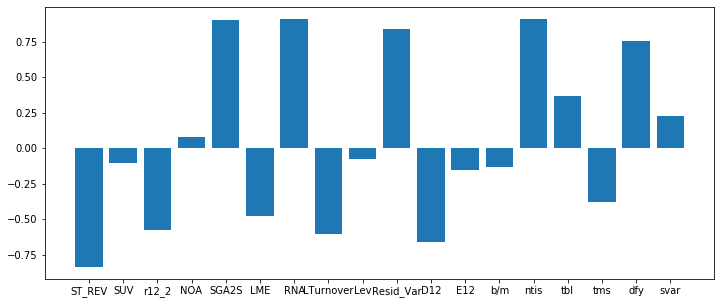

In [17]:
# visualize
plt.figure(figsize=(12,5))
plt.bar(range(len(X.columns)),importances)
t=plt.xticks(range(len(X.columns)),X.columns)
print("############## The selected features are {} ###############".format(best_features))

According to the feature importance plot, the five micros we select according to the calculation above is ['NOA', 'Lev', 'RNA', 'SGA2S', 'Resid_Var']. We find the intuitive explanation as below:
<br><br>
**RNA**: Return on net operating assets. Operating assets are used for conducting ongoing operations of a business. Higher returns on net operating assets should give higher return on stock values.
<br><br>
**SGA2S**: Selling, general and administrative expenses to sales. This ratio directly shows the ability of a company to transform cost into profit, thus highly correlated to returns.
<br><br>
**Resid_Var**: Variance of residuals.Variance measures the volatility of data. A low variance of residuals means a stable amount of remaining cash flow, which brings confidence to investors and thus increases stock returns as most investors are risk-averse.
<br><br>
**NOA**: Net Operating Assets, which is difference between operating assets minus operating liabilities scaled by lagged total assets (AT).NOA has been proved as a good predictor in stock price, and are usually used in fundamental analysis. A good NOA structure brings higher amount of cash flow.
<br><br>
**Lev**: The leverage. Leverage results from using borrowed capital as a funding source when investing to expand the firm's asset base and generate returns on risk capital, and thus highly correlates with volatility. There is also a well-established relationship between stock returns and both implied and realized volatility, called "leverage effect", which is basicly that volatility increases when the stock price falls.Therefore, intuitively, this fatcor is significant. However, though in this case it is ranked as fifth important factors, the mse actually decreases after dropping Lev.
<br><br>
------------
On the other hand, apart from micros, we also found two significant macros that may highly affect returns, and they are intuitively correct as well.
<br><br>
**ntis**: the ratio of 12-month moving sums of net issues by NYSE listed stocks divided by the total end-of-year market capitalization of NYSE stocks. This macro explains the corporate issuing activity, which is closely related to stock price.
<br><br>
**dfy**: The Default Yield Spread (dfy) is the difference between BAA and AAA-rated corporate bond yields. As BAA relates to higher risk loans, dfy is able to measure the possibility of a company to go bankruptcy.Therefore, the predictive power of this macro factor is high.
<br><br>
In later questions, we will still use the whole dataset. And starting from question 4, we will see how hyperparameters of neural network affects training output.

# Question 4

In [4]:
# Cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
def cv(data, k=5):
    kf = KFold(n_splits=k)
    mse_list = []
    for train, test in kf.split(data):
        model, _ = train_nn(X_train, y_train, epochs=1) # add hyperparameters here and before
        pred = model.predict(X_test)
        mse = mean_squared_error(y_test, pred)
        mse_list.append(mse)
    return mse_list

We firstly write down cross validation function in case we need it later.

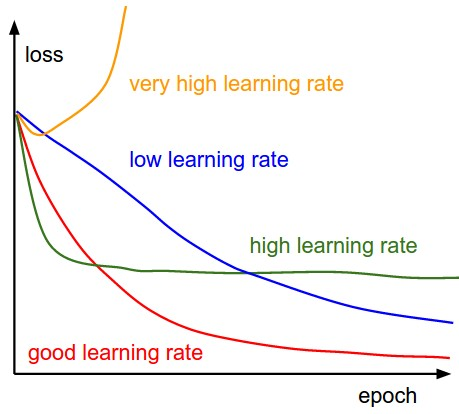

In [2]:
from IPython.display import Image
Image(filename = './Learning Curve.png',width=400,height=400)

(Img Credit: https://cs231n.github.io/neural-networks-3/)

From the figure above, the learning rate affects how quickly the model can converge to a local minima.When the learning rate is extremely high, the loss will first experience a slight drop and then boost to a very high level. When the learning rate is low, it may take a very long process to converge. Compared with a good learning rate, a high learning rate can converge more quicklier but with a relatively higher loss.

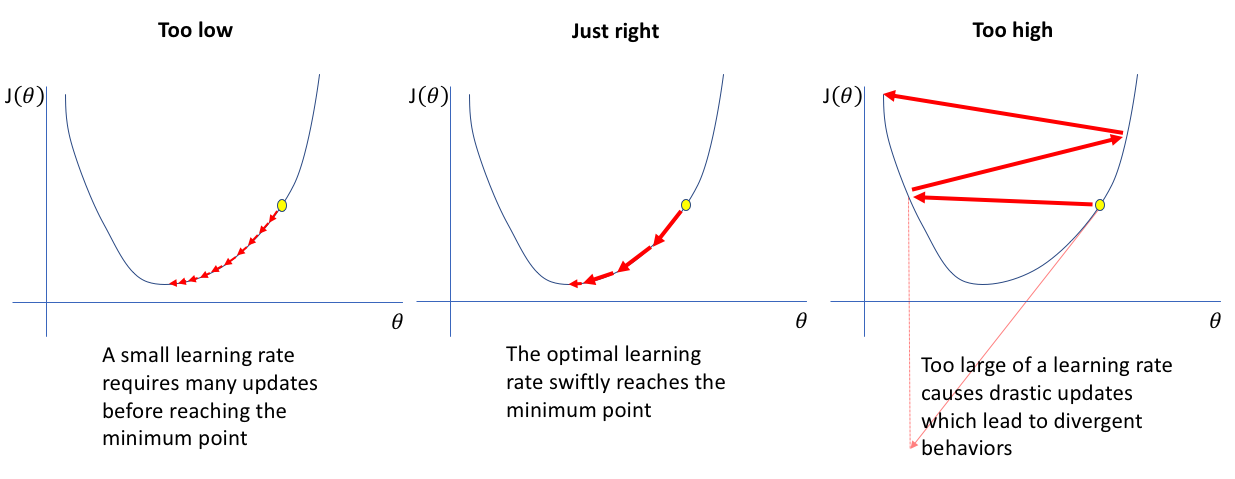

In [3]:
Image(filename = './Learning Rate.png',width=800,height=800)

(Img Credit:https://www.jeremyjordan.me/nn-learning-rate/)

Thus, in this assignment, we will figure out a good learning rate alpha in the following way. Firstly, we will try a wide range of alpha from 1e-1 to 1e-7 and compare the learning curves corresponding to different alphas. Then we will further narrow the range to find a proper value for alpha.

This is alpha 0 :  0.1
Train on 616600 samples
Epoch 1/20
616600/616600 [==============================] - 20s 33us/sample - loss: 0.0224 - mse: 0.0220
Epoch 2/20
616600/616600 [==============================] - 21s 33us/sample - loss: 0.0217 - mse: 0.0217
Epoch 3/20
616600/616600 [==============================] - 18s 30us/sample - loss: 0.0217 - mse: 0.0217
Epoch 4/20
616600/616600 [==============================] - 18s 29us/sample - loss: 0.0217 - mse: 0.0217
Epoch 5/20
616600/616600 [==============================] - 17s 28us/sample - loss: 0.0217 - mse: 0.0217
Epoch 6/20
616600/616600 [==============================] - 18s 28us/sample - loss: 0.0217 - mse: 0.0217
Epoch 7/20
616600/616600 [==============================] - 17s 27us/sample - loss: 0.0217 - mse: 0.0217
Epoch 8/20
616600/616600 [==============================] - 17s 27us/sample - loss: 0.0217 - mse: 0.0217
Epoch 9/20
616600/616600 [==============================] - 17s 28us/sample - loss: 0.0217 - mse: 0.0217
Epoch 10

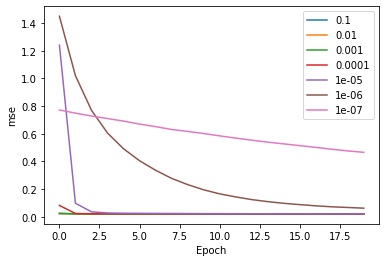

In [17]:
np.random.seed(0)
tf.random.set_seed(0)
alpha_range = [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7]
for i,alpha in enumerate(alpha_range):
    print('This is alpha',i,': ',alpha)
    model, history = train_nn(X_train, y_train, epoch=20, alpha=alpha)
    # plot
    plot_loss(history,alpha)

This is alpha 0 :  1e-05
Train on 616600 samples
Epoch 1/20
616600/616600 [==============================] - 18s 30us/sample - loss: 0.7178 - mse: 0.7130
Epoch 2/20
616600/616600 [==============================] - 19s 30us/sample - loss: 0.1460 - mse: 0.1414
Epoch 3/20
616600/616600 [==============================] - 17s 27us/sample - loss: 0.0556 - mse: 0.0512
Epoch 4/20
616600/616600 [==============================] - 21s 33us/sample - loss: 0.0362 - mse: 0.0321
Epoch 5/20
616600/616600 [==============================] - 20s 33us/sample - loss: 0.0298 - mse: 0.0259
Epoch 6/20
616600/616600 [==============================] - 19s 31us/sample - loss: 0.0269 - mse: 0.0233
Epoch 7/20
616600/616600 [==============================] - 17s 28us/sample - loss: 0.0253 - mse: 0.0220
Epoch 8/20
616600/616600 [==============================] - 15s 24us/sample - loss: 0.0245 - mse: 0.0215
Epoch 9/20
616600/616600 [==============================] - 13s 21us/sample - loss: 0.0239 - mse: 0.0213
Epoch 

616600/616600 [==============================] - 12s 20us/sample - loss: 1.0253 - mse: 1.0205
Epoch 12/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.9539 - mse: 0.9492
Epoch 13/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.8839 - mse: 0.8792
Epoch 14/20
616600/616600 [==============================] - 12s 19us/sample - loss: 0.8214 - mse: 0.8167
Epoch 15/20
616600/616600 [==============================] - 12s 19us/sample - loss: 0.7623 - mse: 0.7576
Epoch 16/20
616600/616600 [==============================] - 12s 19us/sample - loss: 0.7105 - mse: 0.7058
Epoch 17/20
616600/616600 [==============================] - 14s 23us/sample - loss: 0.6596 - mse: 0.6549
Epoch 18/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.6120 - mse: 0.6074
Epoch 19/20
616600/616600 [==============================] - 13s 20us/sample - loss: 0.5706 - mse: 0.5660
Epoch 20/20
616600/616600 [==============================]

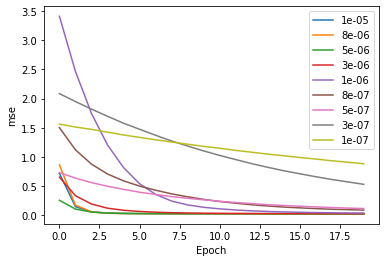

In [88]:
np.random.seed(0)
tf.random.set_seed(0)
alpha_range = [1e-5,8e-6,5e-6,3e-6,1e-6,8e-7,5e-7,3e-7,1e-7]
for i,alpha in enumerate(alpha_range):
    print('This is alpha',i,': ',alpha)
    model, history = train_nn(X_train, y_train, epoch=20, alpha=alpha)
    # plot
    plot_loss(history,alpha)

This is alpha 0 :  1e-05
Train on 616600 samples
Epoch 1/20
616600/616600 [==============================] - 13s 21us/sample - loss: 0.7178 - mse: 0.7130
Epoch 2/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.1460 - mse: 0.1414
Epoch 3/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.0556 - mse: 0.0512
Epoch 4/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.0362 - mse: 0.0321
Epoch 5/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.0298 - mse: 0.0259
Epoch 6/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.0269 - mse: 0.0233
Epoch 7/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.0253 - mse: 0.0220
Epoch 8/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.0245 - mse: 0.0215
Epoch 9/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.0239 - mse: 0.0213
Epoch 

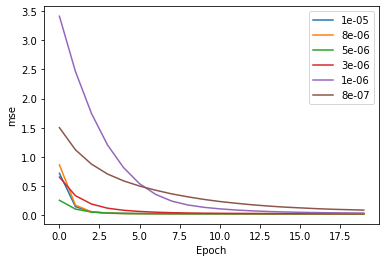

In [89]:
np.random.seed(0)
tf.random.set_seed(0)
alpha_range = [1e-5,8e-6,5e-6,3e-6,1e-6,8e-7]
for i,alpha in enumerate(alpha_range):
    print('This is alpha',i,': ',alpha)
    model, history = train_nn(X_train, y_train, epoch=20, alpha=alpha)
    # plot
    plot_loss(history,alpha)

Train on 616600 samples
Epoch 1/20
616600/616600 [==============================] - 13s 20us/sample - loss: 1.2057 - mse: 1.2008
Epoch 2/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.6397 - mse: 0.6349
Epoch 3/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.3594 - mse: 0.3546
Epoch 4/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.2161 - mse: 0.2114
Epoch 5/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.1382 - mse: 0.1336
Epoch 6/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.0954 - mse: 0.0909
Epoch 7/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.0704 - mse: 0.0659
Epoch 8/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.0555 - mse: 0.0511
Epoch 9/20
616600/616600 [==============================] - 12s 20us/sample - loss: 0.0466 - mse: 0.0423
Epoch 10/20
616600/616600 [====

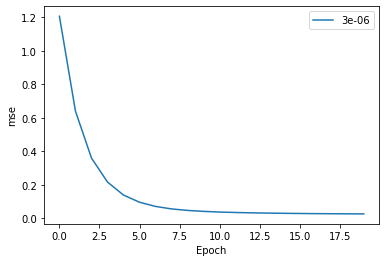

In [90]:
np.random.seed(0)
tf.random.set_seed(0)
alpha = 3e-6
model, history = train_nn(X_train, y_train, epoch=20, alpha=3e-6)
# plot
plot_loss(history,alpha)

In conclusion, the alpha was set to be 3e-6 in order to yield a learning curve that looks satisfactory. The mse was gradually converged into around 0.022.

# Question 5

## Overfitting Problem

Overfitting means the model fits also the errors (could be different in other datasets) in the training set. The total loss consists of three parts, which are bias, variance and small noise (shown in the proof below). Although the bias decrease fitting a complex model, the variance of our predictions in different datasets will increase (the bias variance trade-off). Therefore, if the model is too complex for the dataset, the performance on the test set might not be good. 

\begin{align}
    \text{MSE} & = \mathbb{E}[(Y - \hat{f(x)})^2],~~~~Y = f+\epsilon\\
    \text{MSE} & = \mathbb{E}[Y^2 - 2Y \hat{f} + \hat{f}^2] \\
    & = \mathbb{E}[Y^2] - 2 \mathbb{E}[Y \hat{f}] + \mathbb{E}[\hat{f}^2] \\
    & = \text{Var}(Y) + \mathbb{E}[Y]^2 + \text{Var}(\hat{f}) + \mathbb{E}[\hat{f}]^2 - 2 \mathbb{E}[Y \hat{f}]\\
    & = \text{Var}(f + \epsilon) + \mathbb{E}[f + \epsilon]^2 + \text{Var}(\hat{f}) + \mathbb{E}[\hat{f}]^2 - 2 \mathbb{E}[(f + \epsilon) \hat{f}]\\
    & = \sigma_\epsilon^2 + f^2 + \text{Var}(\hat{f}) + \mathbb{E}[\hat{f}]^2 - 2 f \mathbb{E}[\hat{f}]\\
    & = \sigma_\epsilon^2 + \text{Var}(\hat{f}) + (f - \mathbb{E}[\hat{f}])^2\\
    & = \text{Irreducible Error} + \text{Variance} + \text{Bias}^2
\end{align}


And the following figure visualises the trade-off:

<table><tr><td><img src="gph/bias_variance.png" width="450"></td><td><img src="gph/bias_variance2.png" width="300"></td></tr></table>

(Img Credit: http://scott.fortmann-roe.com/docs/BiasVariance.html/)

Therefore, an optimal model complexity should be selected to obtain the lowest total error (i.e. not overfitting the training set). In the followings, we use the given dataset to validate the bias variance trade-off and select an appropriate complexity of neural network for the training.

In [52]:
valid_ratio = X[vali].shape[0]/X[train+vali].shape[0]

### check the training loss and validation loss (NN depth)

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)

net_depth = [10,15,20,30,40,50,70,100,150,200]
save_txt = ''
for i in range(len(net_depth)):
    if i==0:
        save_txt = save_txt + str(net_depth[i])
    else:
        save_txt = save_txt + '_' + str(net_depth[i])
        
# train neural net
epochs=20
lr = 1e-3
lamda=0.0001
p=0.1
vd_split=valid_ratio
batch_size=256

train_depth=[]
val_depth=[]
for i in range(len(net_depth)):
    num_neurons = [net_depth[i],1]
    num_layers = len(num_neurons)
    print(net_depth[i])
    model, history = train_nn(X_train.values, y_train, epochs=epochs, alpha = lr, verbose=0,
                              num_layers=num_layers,num_neurons=num_neurons,batch_size=batch_size,
                              lamda=lamda, p=p, vd_split=vd_split)
    metrics_train = model.evaluate(X_train.values, y_train)
    mse_train = metrics_train[1]
    train_depth.append(mse_train)
    print('Training MSE in baseline model: %.3f' % mse_train)
    # post-change validation performance evaluation
    metrics_val = model.evaluate(X_vali.values, y_vali)
    mse_val = metrics_val[1]
    val_depth.append(mse_val)
    print('Validation MSE in baseline model: %.3f' % mse_val)
    path = '/Users/macintoshhd/Dropbox/IC_Fintech/Summer_Term/Big_Data2/ASM1/structure/depth'
    np.savetxt(path+'/training_loss_%s.txt'%(save_txt),train_depth)
    np.savetxt(path+'/val_loss_%s.txt'%(save_txt),val_depth)

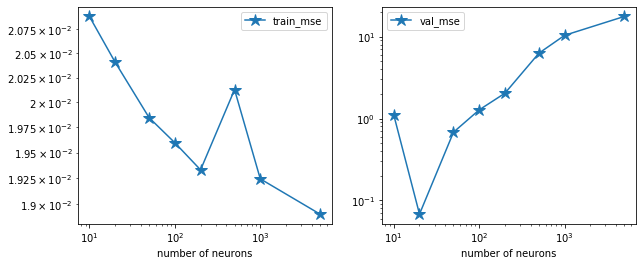

In [23]:
# path = '/Users/macintoshhd/Dropbox/IC_Fintech/Summer_Term/Big_Data2/ASM1/structure/depth'
net_depth = [10,20,50,100,200,500,1000,5000]
# net_depth = [10,15,20,30,40,50,70,100,150,200]
save_txt = ''
for i in range(len(net_depth)):
    if i==0:
        save_txt = save_txt + str(net_depth[i])
    else:
        save_txt = save_txt + '_' + str(net_depth[i])
        
train_loss = np.loadtxt('./training_loss_%s.txt'%(save_txt))
val_loss = np.loadtxt('./val_loss_%s.txt'%(save_txt))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(net_depth, train_loss, label='train_mse', marker='*', ms=12)
plt.xlabel('number of neurons')
plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.subplot(1,2,2)
plt.plot(net_depth, val_loss, label='val_mse', marker='*', ms=12)
plt.xlabel('number of neurons')
plt.yscale('log')
plt.xscale('log')
plt.legend()

### check the training loss and validation loss (NN width)

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)

# train neural net
epochs=20
lr = 1e-3
lamda=0.0001
p=0.1
vd_split=valid_ratio
batch_size=256
neuron = 10
lay_num = 10

train_width=[]
val_width=[]
for i in range(1,lay_num+1):
    num_neurons = [neuron]*i + [1]
    num_layers = len(num_neurons)
    print(num_neurons)
    model, history = train_nn(X_train.values, y_train, epochs=epochs, alpha = lr, verbose=0,
                              num_layers=num_layers,num_neurons=num_neurons,batch_size=batch_size,
                              lamda=lamda, p=p, vd_split=vd_split)
    metrics_train = model.evaluate(X_train.values, y_train)
    mse_train = metrics_train[1]
    train_width.append(mse_train)
    print('Training MSE in baseline model: %.4f' % mse_train)
    # post-change validation performance evaluation
    metrics_val = model.evaluate(X_vali.values, y_vali)
    mse_val = metrics_val[1]
    val_width.append(mse_val)
    print('Validation MSE in baseline model: %.4f' % mse_val)
    path = '/Users/macintoshhd/Dropbox/IC_Fintech/Summer_Term/Big_Data2/ASM1/structure/width'
    np.savetxt(path+'/training_loss_%s_%s.txt'%(neuron,lay_num),train_width)
    np.savetxt(path+'/val_loss_%s_%s.txt'%(neuron,lay_num),val_width)

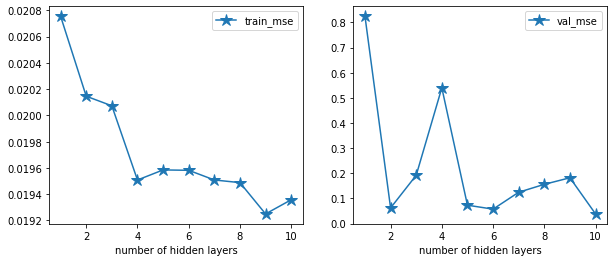

In [56]:
# path = '/Users/macintoshhd/Dropbox/IC_Fintech/Summer_Term/Big_Data2/ASM1/structure/width'
neuron = 10
lay_num = 10
    
train_loss = np.loadtxt('./training_loss_%s_%s.txt'%(neuron,lay_num))
val_loss = np.loadtxt('./val_loss_%s_%s.txt'%(neuron,lay_num))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(np.arange(1,lay_num+1),train_loss, label='train_mse', marker='*', ms=12)
plt.xlabel('number of hidden layers')
# plt.yscale('log')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(1,lay_num+1),val_loss, label='val_mse', marker='*', ms=12)
plt.xlabel('number of hidden layers')
# plt.yscale('log')
plt.legend()

Please note that we set a random seed for reproducing the result. A more robust result could be averaging the loss from multiple random seeds, but this will be left as our future work.

### New views on the bias variance trade-off

As we can see from the above experiments, in the validation set, after the drop in mse by increasing the number of hidden layers from a very simple neural net, the variance will first increase then decrease again when we increase the width of the neural net. This contradicts the traditional bias variance trade-off. The bias variance trade-off in neural network: bias is monotonically decreasing as in the classical theory, the variance is bell-shaped (i.e. the variance increases then decreases with the width of the network). 

<div>
<img src="gph/bias.png",width="650">
</div>

Yang et al. (2020) gives out a simple explanation on why it is often observed that larger models generalize better for neural networks and other over-parameterized models. The figure is an experiment result from the paper.

Yang, Z., Yu, Y., You, C., Steinhardt, J. and Ma, Y., 2020. Rethinking bias-variance trade-off for generalization of neural networks. arXiv preprint arXiv:2002.11328.

### Approaches to prevent overfitting

There are a few approaches to combat the overfitting problem, such as using a less complex model, regularisation and dropout. Regularisation adds an extra element to the loss function, which punishes our model for being too complex. Therefore, the training will minimise the original loss and the penalty together. As we can see in the first figure, increasing the lambda (a scalar controlling the penalty) will increase the penalty, thus reduces the complexity of the model. Another way to reduce the overfitting is dropout. Unit in the hidden layer is given the probability p of being temporarily ignored in calculations, where p is called the dropout rate. Figure 2 shows the procedure of the dropout. The dropout rate p sets the probability of each neuron that being changed to inactive status. In this way, we can also reduce the complexity of the model.

<table><tr><td><img src="gph/regularization.gif" width="300"></td><td><img src="gph/dropout.gif" width="300"></td></tr></table>

Images credit: Piotr Skalski

### Comparison between adding regularization and dropout and not

In [58]:
np.random.seed(0)
tf.random.set_seed(0)
# train neural net
epochs=20
lr = 3e-6
num_neurons = [16,8,1]
num_layers = len(num_neurons)
batch_size=64

model, history = train_nn(X_train.values, y_train, epochs=epochs, alpha = lr, 
                          num_layers=num_layers,num_neurons=num_neurons,batch_size=batch_size)

Train on 616600 samples
Epoch 1/20
616600/616600 [==============================] - 22s 35us/sample - loss: 1.2057 - mse: 1.2008
Epoch 2/20
616600/616600 [==============================] - 20s 33us/sample - loss: 0.6397 - mse: 0.6349
Epoch 3/20
616600/616600 [==============================] - 20s 33us/sample - loss: 0.3594 - mse: 0.3546
Epoch 4/20
616600/616600 [==============================] - 18s 30us/sample - loss: 0.2161 - mse: 0.2114
Epoch 5/20
616600/616600 [==============================] - 21s 35us/sample - loss: 0.1382 - mse: 0.1336
Epoch 6/20
616600/616600 [==============================] - 17s 28us/sample - loss: 0.0954 - mse: 0.0909
Epoch 7/20
616600/616600 [==============================] - 18s 29us/sample - loss: 0.0704 - mse: 0.0659
Epoch 8/20
616600/616600 [==============================] - 16s 26us/sample - loss: 0.0555 - mse: 0.0511
Epoch 9/20
616600/616600 [==============================] - 17s 28us/sample - loss: 0.0466 - mse: 0.0423
Epoch 10/20
616600/616600 [====

In [59]:
# train performance evaluation
metrics = model.evaluate(X_train.values, y_train)
mse_base = metrics[1]
print('Training MSE in baseline model: %.3f' % mse_base)
# validation performance evaluation
metrics = model.evaluate(X_vali.values, y_vali)
mse_base = metrics[1]
print('Validation MSE in baseline model: %.3f' % mse_base)

616600/616600 [==============================] - 17s 27us/sample - loss: 0.0246 - mse: 0.0213
Training MSE in baseline model: 0.021
320245/320245 [==============================] - 9s 27us/sample - loss: 0.0449 - mse: 0.0415
Validation MSE in baseline model: 0.042


### Rebuild the neural network with regularisation and dropout

In [64]:
def train_nn(X, y, epochs=20, verbose=1, alpha=1e-5, batch_size=64, num_layers = 3, num_neurons = [16,8,1], lamda=0.0001,p=0.1,vd_split=0.8,*args, **kwargs):
    model = Sequential()
    
    # input layer
    model.add(Dense(num_neurons[0], activation='relu',
                    kernel_regularizer=l2(l=lamda), 
                    kernel_initializer=he_normal(),
                    input_dim=X.shape[1]))
    model.add(Dropout(p))
    
    # hidden layer
    for i in range(1, num_layers-1):
        model.add(Dense(num_neurons[i], activation='relu', 
                        kernel_regularizer=l2(l=lamda), 
                        kernel_initializer=he_normal()))
        model.add(Dropout(p))

    # output layer
    model.add(Dense(1, activation='linear',
                    kernel_initializer=he_normal()))
    
    # compile
    model.compile(loss='mse',
                  optimizer=Adam(lr=alpha),
                  metrics=['mse'])
    
    tf.keras.backend.set_learning_phase(True)
    history = model.fit(X,y,
                     epochs=epochs, batch_size=batch_size,
                     verbose=verbose)
    tf.keras.backend.set_learning_phase(False)

    return model, history

In [65]:
np.random.seed(0)
tf.random.set_seed(0)
# train neural net
epochs=20
lr = 3e-6
num_neurons = [16, 8, 1]
num_layers = len(num_neurons)
lamda=0.001
p=0.1
batch_size=64

model, history = train_nn(X_train.values, y_train, epochs=epochs, alpha = lr, 
                          num_layers=num_layers,num_neurons=num_neurons,batch_size=batch_size,
                          lamda=lamda, p=p)

Train on 616600 samples
Epoch 1/20
616600/616600 [==============================] - 20s 32us/sample - loss: 1.2498 - mse: 1.2006
Epoch 2/20
616600/616600 [==============================] - 16s 26us/sample - loss: 0.6826 - mse: 0.6346
Epoch 3/20
616600/616600 [==============================] - 17s 27us/sample - loss: 0.4012 - mse: 0.3541
Epoch 4/20
616600/616600 [==============================] - 17s 27us/sample - loss: 0.2565 - mse: 0.2107
Epoch 5/20
616600/616600 [==============================] - 17s 27us/sample - loss: 0.1772 - mse: 0.1327
Epoch 6/20
616600/616600 [==============================] - 17s 28us/sample - loss: 0.1330 - mse: 0.0899
Epoch 7/20
616600/616600 [==============================] - 17s 27us/sample - loss: 0.1065 - mse: 0.0649
Epoch 8/20
616600/616600 [==============================] - 17s 27us/sample - loss: 0.0901 - mse: 0.0501
Epoch 9/20
616600/616600 [==============================] - 17s 28us/sample - loss: 0.0797 - mse: 0.0413
Epoch 10/20
616600/616600 [====

In [66]:
# train performance evaluation
metrics = model.evaluate(X_train.values, y_train)
mse_base = metrics[1]
print('Training MSE in baseline model: %.3f' % mse_base)
# validation performance evaluation
metrics = model.evaluate(X_vali.values, y_vali)
mse_base = metrics[1]
print('Validation MSE in baseline model: %.3f' % mse_base)

616600/616600 [==============================] - 17s 28us/sample - loss: 0.0382 - mse: 0.0212
Training MSE in baseline model: 0.021
320245/320245 [==============================] - 11s 33us/sample - loss: 0.0527 - mse: 0.0358
Validation MSE in baseline model: 0.036


With regularization and drop rate, mse decreases, so we prefer the model with penalization.

And then we tried decreasing the number of hidden layers as well below:

In [70]:
np.random.seed(0)
tf.random.set_seed(0)
# train neural net
epochs=20
lr = 3e-6
num_neurons = [12, 6, 1]
num_layers = len(num_neurons)
lamda=0.001
p=0.1
batch_size=64

model, history = train_nn(X_train.values, y_train, epochs=epochs, alpha = lr,
                          num_layers=num_layers,num_neurons=num_neurons,batch_size=batch_size,
                          lamda=lamda, p=p)

Train on 616600 samples
Epoch 1/20
616600/616600 [==============================] - 17s 28us/sample - loss: 3.7357 - mse: 3.6992
Epoch 2/20
616600/616600 [==============================] - 19s 31us/sample - loss: 1.6919 - mse: 1.6558
Epoch 3/20
616600/616600 [==============================] - 17s 28us/sample - loss: 0.8241 - mse: 0.7885
Epoch 4/20
616600/616600 [==============================] - 16s 26us/sample - loss: 0.4706 - mse: 0.4355
Epoch 5/20
616600/616600 [==============================] - 15s 25us/sample - loss: 0.2866 - mse: 0.2521
Epoch 6/20
616600/616600 [==============================] - 15s 24us/sample - loss: 0.1846 - mse: 0.1507
Epoch 7/20
616600/616600 [==============================] - 15s 25us/sample - loss: 0.1272 - mse: 0.0939
Epoch 8/20
616600/616600 [==============================] - 15s 25us/sample - loss: 0.0979 - mse: 0.0653
Epoch 9/20
616600/616600 [==============================] - 15s 24us/sample - loss: 0.0800 - mse: 0.0481
Epoch 10/20
616600/616600 [====

In [71]:
# train performance evaluation
metrics = model.evaluate(X_train.values, y_train)
mse_base = metrics[1]
print('Training MSE in baseline model: %.3f' % mse_base)
# validation performance evaluation
metrics = model.evaluate(X_vali.values, y_vali)
mse_base = metrics[1]
print('Validation MSE in baseline model: %.3f' % mse_base)

616600/616600 [==============================] - 18s 29us/sample - loss: 0.0394 - mse: 0.0211
Training MSE in baseline model: 0.021
320245/320245 [==============================] - 9s 30us/sample - loss: 0.0531 - mse: 0.0349
Validation MSE in baseline model: 0.035


The result on validation set is slightly better than previous one. The conclusion is that, after making the structure less complicated and adding penalty terms, the model performs better on validation set.

# Question 6

Based on previous conclusion, we would use two hidden layers with 12 and 6 neurons respectively with regularization term as our model structure.

In [84]:
# Preferred architecture 
lamda=0.001
alpha = 3e-6
# optimization = Adam
epochs=20
lr = 3e-6
num_neurons = [12, 6, 1]
num_layers = len(num_neurons)
lamda=0.001
p=0.1
batch_size=64
np.random.seed(0)
tf.random.set_seed(0)

def train_nn2(X, y, epochs=20, verbose=1, *args, **kwargs):
    model = Sequential()
    
    # input layer
    model.add(Dense(num_neurons[0], activation='relu',
                    kernel_regularizer=l2(l=lamda), 
                    kernel_initializer=he_normal(),
                    input_dim=X.shape[1]))
    model.add(Dropout(p))
    
    # hidden layer
    for i in range(1, num_layers-1):
        model.add(Dense(num_neurons[i], activation='relu', 
                        kernel_regularizer=l2(l=lamda), 
                        kernel_initializer=he_normal()))
        model.add(Dropout(p))

    # output layer
    model.add(Dense(1, activation='linear',
                    kernel_initializer=he_normal()))
    
    # compile
    model.compile(loss='mse',
                  optimizer=Adam(learning_rate=alpha),
                  metrics=['mse'])
    
    tf.keras.backend.set_learning_phase(True)
    history = model.fit(X,y,
                     epochs=epochs, batch_size=64,
                     verbose=verbose)
    tf.keras.backend.set_learning_phase(False)

    return model, history

In [85]:
# train the new model
model, history = train_nn2(X_train, y_train, epoch=20, learning_rate = 3e-6)
# evaluation on train,validation and test data
metrics_train2 = model.evaluate(X_train, y_train)

metrics_vali2 = model.evaluate(X_vali,y_vali)

metrics_test2 = model.evaluate(X_test,y_test)

print("#######################################The evaluation matrix###########################################")
print('New train mse: '+str(metrics_train2[1]))
print('New validation mse: '+str(metrics_vali2[1]))
print('New test mse: '+str(metrics_test2[1]))

print('New train loss: '+str(metrics_train2[0]))
print('New validation loss: '+str(metrics_vali2[0]))
print('New test loss: '+str(matrics_test2[0]))

Train on 616600 samples
Epoch 1/20
616600/616600 [==============================] - 17s 27us/sample - loss: 3.7357 - mse: 3.6992
Epoch 2/20
616600/616600 [==============================] - 19s 31us/sample - loss: 1.6919 - mse: 1.6558
Epoch 3/20
616600/616600 [==============================] - 15s 25us/sample - loss: 0.8241 - mse: 0.7885
Epoch 4/20
616600/616600 [==============================] - 15s 25us/sample - loss: 0.4706 - mse: 0.4355
Epoch 5/20
616600/616600 [==============================] - 16s 25us/sample - loss: 0.2866 - mse: 0.2521
Epoch 6/20
616600/616600 [==============================] - 15s 24us/sample - loss: 0.1846 - mse: 0.1507
Epoch 7/20
616600/616600 [==============================] - 16s 26us/sample - loss: 0.1272 - mse: 0.0939
Epoch 8/20
616600/616600 [==============================] - 15s 25us/sample - loss: 0.0979 - mse: 0.0653
Epoch 9/20
616600/616600 [==============================] - 15s 24us/sample - loss: 0.0800 - mse: 0.0481
Epoch 10/20
616600/616600 [====

<BarContainer object of 3 artists>

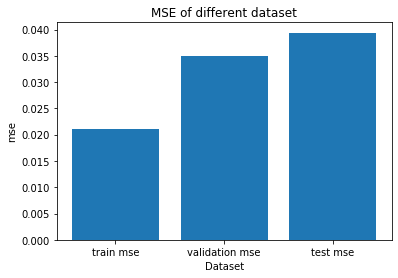

In [86]:
# Visualize
label_Q6 = ['train mse', 'validation mse', 'test mse']
mses = [metrics_train2[1], metrics_vali2[1], metrics_test2[1]]
plt.title('MSE of different dataset')
plt.xlabel('Dataset')
plt.ylabel('mse')
plt.bar(label_Q6, mses)

# Question 7

**Lasso**

When alpha = 0 (the penalize parameter), Lasso regression produces the same coefficients as a linear regression. <br><br>
When alpha is very very large, all coefficients are zero.<br><br>
We don't have to choose a large alpha because we've already choose 5 features.

In [78]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

def lasso(x, y, feature, label, alphas):
    
    mse = []
    for alpha in alphas:
        clf = linear_model.Lasso(alpha).fit(x, y)
        ### stop if all of coefficients are 0
        if np.count_nonzero(clf.coef_) == 0:
            return mse
        pred = clf.predict(feature)
        
        mse.append(mean_squared_error(label, pred))
        
    return mse

alphas = np.linspace(0, 0.01, 50)[1:]
mse = lasso(X_train, y_train, X_vali, y_vali, alphas)

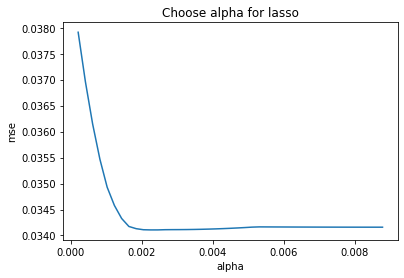

In [79]:
plt.title('Choose alpha for lasso')
plt.ylabel('mse')
plt.xlabel('alpha')
plt.plot(alphas[:len(mse)], mse)

In [80]:
# Select alpha from cv
lasso_alpha = alphas[mse.index(min(mse))]

In [81]:
# Mse for lasso
clf = linear_model.Lasso(lasso_alpha).fit(X_train, y_train)
pred = clf.predict(X_test)
error_lasso = (mean_squared_error(y_test, pred))

In [82]:
# Mse for neural network
error_nn = metrics_test2[1]

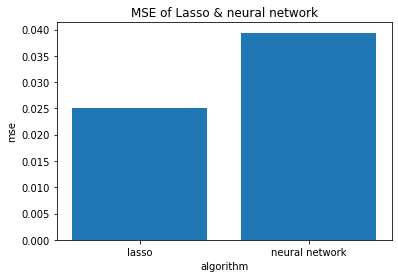

In [83]:
# Conparison and visualization
error = [error_lasso,  error_nn]
label = ['lasso', 'neural network']

plt.title('MSE of Lasso & neural network')
plt.xlabel('algorithm')
plt.ylabel('mse')
plt.bar(label, error)
plt.show()

**Conclusion**:
<br><br>
Comparing with the results in previous questions, Lasso is better than neural network. This result may come from the fact that most factors in this dataset are not really effective. Since lasso automatically drops some of useless regressors, its performance on test set will be powerful. Thus, for neural network, we may need to try other structure or other hyperparameter such as batch size or higher drop rate.

# Question 8

Firstly, again, to have an intuition, we need to search for papers that are related to these micros and macros, and hopefully drop some of them if not suitable intuitively. 

Then we can test these factors numerically. One method that we can try is to run the forward or backward stepwise regression, either select factors by adding one factor into the existing model and pick the best model using $R^2$ or other prefered criterion each loop or eliminating factors from the full model with 38 fatcors (the original 10 micros + 8 macros + the new 20 factors) using similar steps.

Another methods is same as what we did in question 2. We can firstly run a regression using all factors and record a mse as benchmark. Then we can design a loop, for each loop we drop one factor and calculate the mse again. The evaluation is based on difference between the new mse and benchmark. If mse increases after dropping a certain factor, the fatcor is important in prediction. And finally we can rank that difference to get most important factors.

There are also other ways for dimension reduction such as Principle Component Analysis and Singular Vector Decomposition. These methods are efficient, and eliminate useless factors using matrix operations.

Finally, as we can see from question 7, lasso itself is a very powerful tool to do feature selection. The regressors with lower coefficient will be simply drop by the penalty term, and it can directly output result. Moreover, it is simple to implement. Other models like Linear Discriminant Analysis have similar functions. I would recommend one to use these models as the first choice in this case.